# Money Flow Index (MFI) - Comprehensive Visualization

**Formula**: Volume-weighted RSI that measures buying and selling pressure

MFI combines price and volume to identify overbought/oversold conditions:
1. Typical Price = (High + Low + Close) / 3
2. Money Flow = Typical Price × Volume
3. Positive Money Flow = sum of MF when typical price rises
4. Negative Money Flow = sum of MF when typical price falls
5. Money Ratio = Positive MF / Negative MF
6. **MFI = 100 - (100 / (1 + Money Ratio))**

## Interpretation

- **MFI > 80**: Overbought (strong buying pressure, potential reversal down)
- **MFI > 70**: Strong bullish, watch for reversal signals
- **MFI < 20**: Oversold (strong selling pressure, potential reversal up)
- **MFI < 30**: Strong bearish, watch for reversal signals
- **MFI = 50**: Neutral (balanced buying/selling pressure)
- **Rising MFI**: Increasing buying pressure (bullish)
- **Falling MFI**: Increasing selling pressure (bearish)

## Key Signals

1. **Overbought/Oversold**: Classic reversal setup
   - Sell signal: MFI > 80 and starts declining
   - Buy signal: MFI < 20 and starts rising

2. **Divergence (Most Reliable Signal)**:
   - Bearish divergence: Price makes new high, but MFI doesn't (weakness ahead)
   - Bullish divergence: Price makes new low, but MFI doesn't (strength ahead)

3. **Volume-Confirmed Breakouts**:
   - Both price AND MFI rising together = strong bullish move
   - Both price AND MFI falling together = strong bearish move

4. **Failure Swings**:
   - MFI fails to exceed previous high = potential reversal

## Why MFI vs RSI?

- **MFI incorporates volume** (RSI is price-only)
- **Volume is a leading indicator** → MFI often signals before price
- **Better for accumulation/distribution detection**
- **More reliable in volume-driven markets**
- **Naturally weighted by intensity** of buying/selling pressure

In [1]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from indikator import mfi

plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

## Scenario 1: Volume-Confirmed Breakout

Both price and MFI rising together = strong bullish continuation signal

/tmp/sselcuk/ipykernel_1244330/4213368433.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


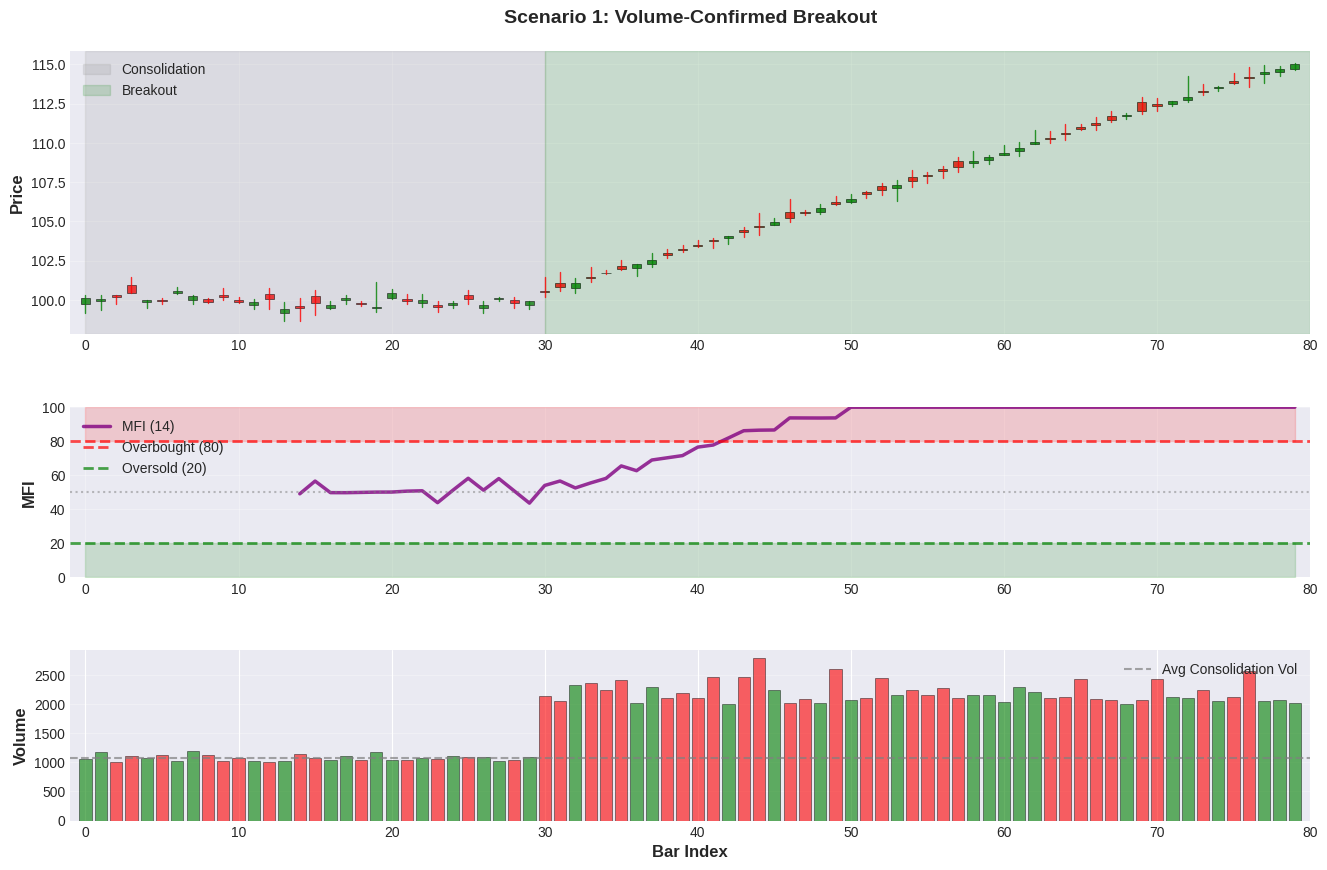

Analysis of Volume-Confirmed Breakout:
Consolidation Phase (0-30):
  Avg MFI: 50.91
  Avg Volume: 1076

Breakout Phase (30-80):
  Avg MFI: 89.73
  Avg Volume: 2201

Signal Confirmation:
  ✓ Price breaking above 100.5 (consolidation high)
  ✓ MFI rising to 100.0 (strong buying pressure)
  ✓ Volume increasing dramatically (2.0x)
  → Strong bullish continuation = STRONG BUY SIGNAL


In [2]:
# Create volume-confirmed breakout scenario
n = 80
dates = pd.date_range('2024-01-01 09:30', periods=n, freq='5min')

# Price phases: consolidation → breakout with high volume
consolidation_price = 100 + np.random.randn(30) * 0.3
breakout_price = np.linspace(100.5, 115, 50)  # Strong uptrend
closes = np.concatenate([consolidation_price, breakout_price])

# Volume: normal during consolidation, HIGH during breakout
consolidation_vol = 1000 + np.abs(np.random.randn(30)) * 100
breakout_vol = 2000 + np.abs(np.random.randn(50)) * 300  # Much higher
volumes = np.concatenate([consolidation_vol, breakout_vol])

# Create realistic OHLC
opens = closes + np.random.randn(n) * 0.2
highs = np.maximum(opens, closes) + np.abs(np.random.randn(n)) * 0.4
lows = np.minimum(opens, closes) - np.abs(np.random.randn(n)) * 0.4

df1 = pd.DataFrame({
    'open': opens,
    'high': highs,
    'low': lows,
    'close': closes,
    'volume': volumes
}, index=dates)

result1 = mfi(df1, window=14)

# Plot
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(3, 1, height_ratios=[2.5, 1.5, 1.5], hspace=0.35)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Candlesticks
for i in range(len(df1)):
    color = 'green' if df1['close'].iloc[i] >= df1['open'].iloc[i] else 'red'
    ax1.plot([i, i], [df1['low'].iloc[i], df1['high'].iloc[i]], color=color, linewidth=1, alpha=0.8)
    height = abs(df1['close'].iloc[i] - df1['open'].iloc[i])
    if height < 0.05: height = 0.1
    bottom = min(df1['open'].iloc[i], df1['close'].iloc[i])
    ax1.add_patch(plt.Rectangle((i-0.3, bottom), 0.6, height, facecolor=color, edgecolor='black', linewidth=0.5, alpha=0.8))

# Highlight phases
ax1.axvspan(0, 30, alpha=0.15, color='gray', label='Consolidation')
ax1.axvspan(30, 80, alpha=0.15, color='green', label='Breakout')
ax1.set_ylabel('Price', fontsize=12, fontweight='bold')
ax1.set_title('Scenario 1: Volume-Confirmed Breakout', fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-1, len(df1))

# MFI with overbought/oversold zones
mfi_values = result1['mfi'].values
ax2.plot(range(len(df1)), mfi_values, 'purple', linewidth=2.5, label='MFI (14)', alpha=0.8)
ax2.axhline(80, color='red', linestyle='--', linewidth=2, label='Overbought (80)', alpha=0.7)
ax2.axhline(20, color='green', linestyle='--', linewidth=2, label='Oversold (20)', alpha=0.7)
ax2.axhline(50, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
ax2.fill_between(range(len(df1)), 80, 100, alpha=0.15, color='red')
ax2.fill_between(range(len(df1)), 0, 20, alpha=0.15, color='green')
ax2.set_ylabel('MFI', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1, len(df1))

# Volume
colors_vol = ['green' if df1['close'].iloc[i] >= df1['open'].iloc[i] else 'red' for i in range(len(df1))]
ax3.bar(range(len(df1)), df1['volume'].values, color=colors_vol, alpha=0.6, edgecolor='black', linewidth=0.5)
ax3.axhline(df1['volume'][:30].mean(), color='gray', linestyle='--', linewidth=1.5, label='Avg Consolidation Vol', alpha=0.7)
ax3.set_xlabel('Bar Index', fontsize=12, fontweight='bold')
ax3.set_ylabel('Volume', fontsize=12, fontweight='bold')
ax3.legend(loc='upper right', fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_xlim(-1, len(df1))

plt.tight_layout()
plt.show()

print('Analysis of Volume-Confirmed Breakout:')
print(f'Consolidation Phase (0-30):')
print(f'  Avg MFI: {result1["mfi"].iloc[0:30].mean():.2f}')
print(f'  Avg Volume: {df1["volume"].iloc[0:30].mean():.0f}')
print(f'\nBreakout Phase (30-80):')
print(f'  Avg MFI: {result1["mfi"].iloc[30:80].mean():.2f}')
print(f'  Avg Volume: {df1["volume"].iloc[30:80].mean():.0f}')
print(f'\nSignal Confirmation:')
print(f'  ✓ Price breaking above 100.5 (consolidation high)')
print(f'  ✓ MFI rising to {result1["mfi"].iloc[30:80].max():.1f} (strong buying pressure)')
print(f'  ✓ Volume increasing dramatically ({df1["volume"].iloc[30:80].mean() / df1["volume"].iloc[0:30].mean():.1f}x)')
print(f'  → Strong bullish continuation = STRONG BUY SIGNAL')

## Scenario 2: Bearish Divergence

Price reaches new highs but MFI fails to confirm = weakness signal, potential reversal

/tmp/sselcuk/ipykernel_1244330/1160034764.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


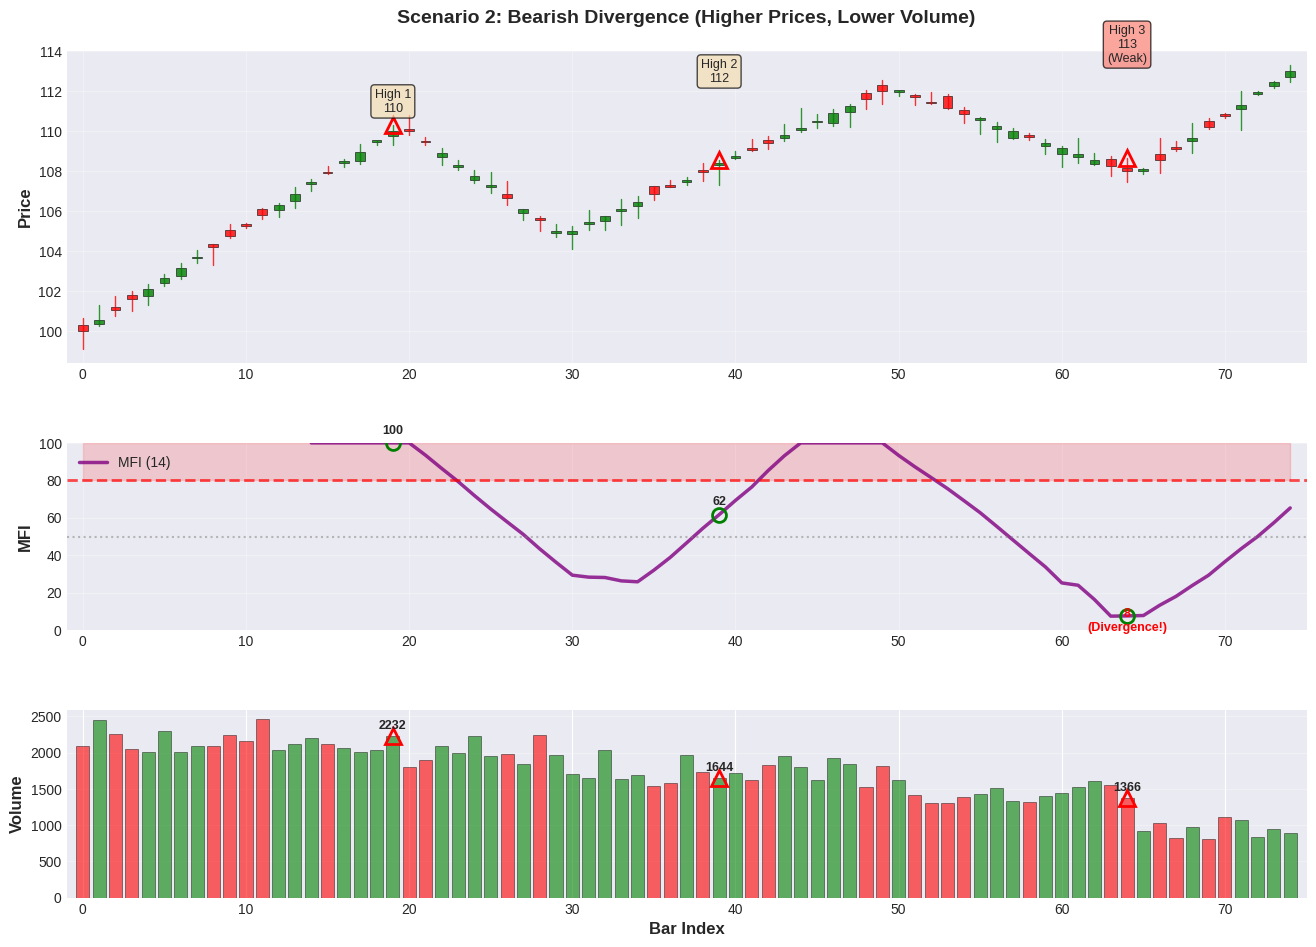

Bearish Divergence Analysis:

Leg 1 (0-30): Price 100.0 → 110.0
  MFI Peak: 100.0
  Avg Volume: 2100

Leg 2 (30-50): Price makes higher high (112) BUT weaker confirmation
  MFI Peak: 100.0 (LOWER than Leg 1!)
  Avg Volume: 1742 (LOWER than Leg 1!)

Leg 3 (50-75): Price barely higher (113) on very weak volume
  MFI Peak: 93.3 (MUCH LOWER than previous peaks!)
  Avg Volume: 1237 (DECLINING!)

DIVERGENCE SIGNAL:
  ✗ Price making new highs (bullish appearance)
  ✗ BUT MFI failing to confirm (declining buying pressure)
  ✗ Volume declining significantly
  → BEARISH DIVERGENCE = Reversal likely incoming = SELL SIGNAL


In [3]:
# Create bearish divergence scenario
n2 = 75
dates2 = pd.date_range('2024-01-01 10:30', periods=n2, freq='5min')

# Price: makes higher highs but buying pressure weakens
# First leg: strong up
price1 = np.linspace(100, 110, 20)
pullback1 = np.linspace(110, 105, 10)
# Second leg: makes new high (112) but with weaker volume
price2 = np.linspace(105, 112, 20)
pullback2 = np.linspace(112, 108, 15)
# Third leg: tiny new high (113) on declining volume/MFI
price3 = np.linspace(108, 113, 10)

closes2 = np.concatenate([price1, pullback1, price2, pullback2, price3])

# Volume: DECREASES with each leg (divergence!)
vol1 = 2000 + np.abs(np.random.randn(20)) * 300
vol1b = 1800 + np.abs(np.random.randn(10)) * 200
vol2 = 1500 + np.abs(np.random.randn(20)) * 250  # Lower
vol2b = 1300 + np.abs(np.random.randn(15)) * 200
vol3 = 800 + np.abs(np.random.randn(10)) * 150   # Much lower
volumes2 = np.concatenate([vol1, vol1b, vol2, vol2b, vol3])

# Create OHLC
opens2 = closes2 + np.random.randn(n2) * 0.2
highs2 = np.maximum(opens2, closes2) + np.abs(np.random.randn(n2)) * 0.4
lows2 = np.minimum(opens2, closes2) - np.abs(np.random.randn(n2)) * 0.4

df2 = pd.DataFrame({
    'open': opens2,
    'high': highs2,
    'low': lows2,
    'close': closes2,
    'volume': volumes2
}, index=dates2)

result2 = mfi(df2, window=14)

# Plot
fig = plt.figure(figsize=(16, 11))
gs = GridSpec(3, 1, height_ratios=[2.5, 1.5, 1.5], hspace=0.35)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Candlesticks
for i in range(len(df2)):
    color = 'green' if df2['close'].iloc[i] >= df2['open'].iloc[i] else 'red'
    ax1.plot([i, i], [df2['low'].iloc[i], df2['high'].iloc[i]], color=color, linewidth=1, alpha=0.8)
    height = abs(df2['close'].iloc[i] - df2['open'].iloc[i])
    if height < 0.05: height = 0.1
    bottom = min(df2['open'].iloc[i], df2['close'].iloc[i])
    ax1.add_patch(plt.Rectangle((i-0.3, bottom), 0.6, height, facecolor=color, edgecolor='black', linewidth=0.5, alpha=0.8))

# Mark price highs
highs_indices = [19, 39, 64]  # Approximate indices of highs
for idx in highs_indices:
    if idx < len(df2):
        ax1.plot(idx, df2['high'].iloc[idx], 'r^', markersize=12, markerfacecolor='none', markeredgewidth=2)

ax1.text(19, 111, 'High 1\n110', ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
ax1.text(39, 112.5, 'High 2\n112', ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
ax1.text(64, 113.5, 'High 3\n113\n(Weak)', ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='salmon', alpha=0.7))

ax1.set_ylabel('Price', fontsize=12, fontweight='bold')
ax1.set_title('Scenario 2: Bearish Divergence (Higher Prices, Lower Volume)', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-1, len(df2))

# MFI with peaks marked
mfi_values2 = result2['mfi'].values
ax2.plot(range(len(df2)), mfi_values2, 'purple', linewidth=2.5, label='MFI (14)', alpha=0.8)
ax2.axhline(80, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax2.axhline(50, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
ax2.fill_between(range(len(df2)), 80, 100, alpha=0.15, color='red')

# Mark MFI peaks
for idx in highs_indices:
    if idx < len(df2):
        ax2.plot(idx, mfi_values2[idx], 'go', markersize=10, markerfacecolor='none', markeredgewidth=2)

ax2.text(19, mfi_values2[19] + 5, f'{mfi_values2[19]:.0f}', ha='center', fontsize=9, fontweight='bold')
ax2.text(39, mfi_values2[39] + 5, f'{mfi_values2[39]:.0f}', ha='center', fontsize=9, fontweight='bold')
ax2.text(64, mfi_values2[64] - 8, f'{mfi_values2[64]:.0f}\n(Divergence!)', ha='center', fontsize=9, fontweight='bold', color='red')

ax2.set_ylabel('MFI', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1, len(df2))

# Volume
colors_vol2 = ['green' if df2['close'].iloc[i] >= df2['open'].iloc[i] else 'red' for i in range(len(df2))]
ax3.bar(range(len(df2)), df2['volume'].values, color=colors_vol2, alpha=0.6, edgecolor='black', linewidth=0.5)

# Mark volume at peaks
for idx in highs_indices:
    if idx < len(df2):
        ax3.plot(idx, df2['volume'].iloc[idx], 'r^', markersize=12, markerfacecolor='none', markeredgewidth=2)
        ax3.text(idx, df2['volume'].iloc[idx] + 100, f'{df2["volume"].iloc[idx]:.0f}', ha='center', fontsize=9, fontweight='bold')

ax3.set_xlabel('Bar Index', fontsize=12, fontweight='bold')
ax3.set_ylabel('Volume', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_xlim(-1, len(df2))

plt.tight_layout()
plt.show()

print('Bearish Divergence Analysis:')
print(f'\nLeg 1 (0-30): Price {df2["close"].iloc[0]:.1f} → {df2["close"].iloc[20]:.1f}')
print(f'  MFI Peak: {result2["mfi"].iloc[0:30].max():.1f}')
print(f'  Avg Volume: {df2["volume"].iloc[0:30].mean():.0f}')
print(f'\nLeg 2 (30-50): Price makes higher high (112) BUT weaker confirmation')
print(f'  MFI Peak: {result2["mfi"].iloc[30:50].max():.1f} (LOWER than Leg 1!)')
print(f'  Avg Volume: {df2["volume"].iloc[30:50].mean():.0f} (LOWER than Leg 1!)')
print(f'\nLeg 3 (50-75): Price barely higher (113) on very weak volume')
print(f'  MFI Peak: {result2["mfi"].iloc[50:75].max():.1f} (MUCH LOWER than previous peaks!)')
print(f'  Avg Volume: {df2["volume"].iloc[50:75].mean():.0f} (DECLINING!)')
print(f'\nDIVERGENCE SIGNAL:')
print(f'  ✗ Price making new highs (bullish appearance)')
print(f'  ✗ BUT MFI failing to confirm (declining buying pressure)')
print(f'  ✗ Volume declining significantly')
print(f'  → BEARISH DIVERGENCE = Reversal likely incoming = SELL SIGNAL')

## Key Takeaways: MFI vs RSI

### MFI (Money Flow Index)
- **Incorporates volume**: Weighted by trading intensity
- **Volume is leading indicator**: Often signals before price
- **Detects accumulation/distribution**: Shows where smart money is
- **More reliable in volume-driven markets**: Futures, crypto, stocks with large trades
- **Divergence signals**: Price peaks without MFI confirmation = reversal

### RSI (Relative Strength Index)
- **Price only**: No volume information
- **Time-based**: Slower to signal changes
- **Good for trend strength**: High RSI = strong momentum
- **Lagging indicator**: Often confirms after volume has already shifted
- **Susceptible to whipsaws**: Can stay overbought/oversold for extended periods

### Why Volume Matters

**Example: Two scenarios, same price action**
- **Scenario A**: Price up 5% on 100k volume → Small players buying (weak)
- **Scenario B**: Price up 5% on 10M volume → Institutional buying (strong)

RSI would be identical in both cases. MFI would show huge difference!

## Trading Rules

### Entry Signals
1. **Bullish**: MFI < 20 AND starting to rise (oversold reversal)
2. **Bullish**: MFI crosses 50 upward while price breaks resistance (confirming breakout)
3. **Bullish**: MFI rising above previous peak as price makes new high (momentum confirmation)
4. **Bearish**: MFI > 80 AND starting to fall (overbought reversal)
5. **Bearish**: MFI crosses 50 downward while price breaks support (confirming breakdown)
6. **Bearish**: MFI making lower peak while price makes higher high (divergence reversal)

### Exit Signals
1. **Exit long**: MFI breaks below 50 after peak
2. **Exit long**: Bearish divergence appears
3. **Exit short**: MFI breaks above 50 after trough
4. **Exit short**: Bullish divergence appears
5. **Risk management**: Hard stop at recent swing extreme

### Best Practices
- **Combine with price action**: Don't trade MFI in isolation
- **Use with support/resistance**: MFI confirms breakouts
- **Watch volume spikes**: High volume at MFI extremes = strong signal
- **Divergence is most reliable**: Price/MFI mismatch signals reversals
- **14-period default**: Equivalent to RSI(14) for comparison
- **Multi-timeframe**: Confirm signal on multiple timeframes (5min, 15min, hourly)

## Window Parameter Effects

- **Short window (7-9)**: Very responsive, many signals, more false signals
- **Medium window (14)**: Standard balance (default)
- **Long window (21)**: Smoother, fewer signals, more reliable

## Performance

- Numba-optimized for speed
- Processes 10,000+ bars instantly
- Returns both MFI and typical price
- Handles edge cases (no volume changes, price gaps)

## Summary

**MFI is superior to RSI when:**
- Volume matters (crypto, futures, stocks with large institutional trades)
- You want to detect accumulation/distribution patterns
- You need early warning signals (volume leads price)
- Looking for divergence reversals (most reliable signal)

**Use RSI when:**
- Volume data is unreliable or unavailable
- Trading very liquid instruments where volume is always high
- You want a simpler, noise-filtered indicator

**Best approach:** Combine both indicators
- MFI for early volume signals
- RSI for momentum confirmation
- Price action for entry/exit timing

## Feature Showcase: Safety & Configuration

In [4]:
# Configuration & Validation Showcase
# ---------------------------------------------------------
import pandas as pd
import numpy as np
from indikator import mfi

# 1. Configuration with .Config()
print(f"--- Custom mfi Configuration ---")
# Create a fully configured version of the indicator
# This factory pattern validates parameters at creation time
custom_mfi = mfi.Config(window=20).make()
print(f"Created: {custom_mfi}")

# 2. Validation Safety
print(f"--- Input Validation Safety ---")
try:
    # Attempt to use invalid data (missing columns)
    invalid_data = pd.DataFrame({'close': [100]}) # Missing high/low/volume
    print("Attempting calculation with invalid inputs...")
    mfi(invalid_data)
except Exception as e:
    # The @validated decorator automatically catches the issue
    print(f"✓ Validator caught error as expected: {e}")


--- Custom mfi Configuration ---
Created: mfi(window=20, epsilon=1e-09)
--- Input Validation Safety ---
Attempting calculation with invalid inputs...
✓ Validator caught error as expected: Validation failed for parameter 'data' in 'mfi' (HasColumns): Missing columns: ['high', 'low', 'volume']
